In [52]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import re

In [53]:
data = pd.read_csv('data/furlough-feelings-april-2020.csv')

In [54]:
data.head()

,Have you been furloughed?,"Overall, are you finding being furloughed a positive experience?","That's great to hear, can you tell me why you're enjoying it?","Are you now working as part of a scaled back team, whilst your colleagues are furloughed?","Overall, are you finding being part of scaled-back, caretaker team a positive experience?","I'm sorry to hear that, can you tell me why it's not a positive experience?",Have you learned anything new about yourself?,What would help you most right now?,"That's really good to hear, why do you think that is?",Submitted At,Token
0,True,True,I’m feel like I now have the time to invest in...,NaN,NaN,NaN,I enjoy being at home more than I thought.,NaN,NaN,4/5/2020 15:39:56,q7ygqc0wetve1pgq7998ef1l3h3ghomc
1,True,True,I have lots of creative pursuits that I often ...,NaN,NaN,NaN,I'm definitely obsessively productive! If I ha...,NaN,NaN,4/5/2020 16:03:20,qsle0bp9xi6c9n0nic0qsle0ma3xovzq
2,True,False,NaN,NaN,NaN,Feeling very useless and often times even wort...,NaN,Hmmm...good question. I've been asking myself ...,NaN,4/5/2020 18:55:11,ia3cphe6oj1358lw2hnmia3cphry4t6x
3,True,True,"I have more time to study, I am able to spend ...",NaN,NaN,NaN,"Yes I do need structure, so I have to plan eac...",NaN,NaN,4/5/2020 21:16:39,d7x57388oj9pfzwzwod7x5738uex2vna
4,True,True,Recently moved house so I am very busy. I am n...,NaN,NaN,NaN,I took things for granted and can be impatient...,NaN,NaN,4/6/2020 6:46:19,08h6epyvgp4h1722y08h6epy986gkfnt


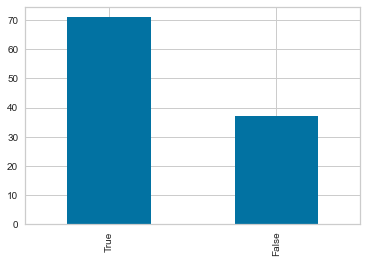

In [55]:
data['Have you been furloughed?'].value_counts().plot.bar()

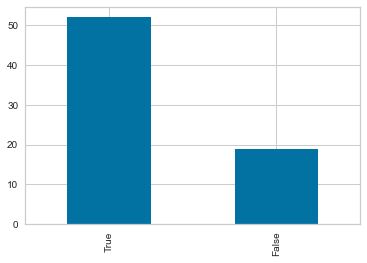

In [56]:
data['Overall, are you finding being furloughed a positive experience?'].value_counts().plot.bar()

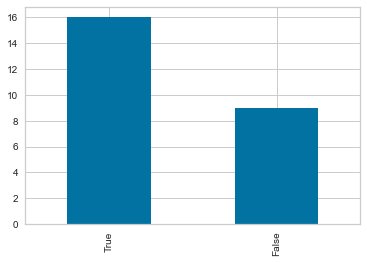

In [57]:
data['Overall, are you finding being part of scaled-back, caretaker team a positive experience?'].value_counts().plot.bar()

In [77]:
why_enjoying_it = data.iloc[:,[2,10]]
why_enjoying_it.columns = ['text', 'token']
why_enjoying_it = why_enjoying_it.dropna()
print(len(why_enjoying_it))

52


In [61]:
why_not_positive = data.iloc[:,[5,10]]
why_not_positive.columns = ['text', 'token']
why_not_positive = why_not_positive.dropna()
print(len(why_not_positive))

28


In [72]:
learned_anything = data.iloc[:,[6,10]]
learned_anything.columns = ['text', 'token']
learned_anything = learned_anything.dropna()
print(len(learned_anything))

52


In [73]:
what_would_help_you = data.iloc[:,[7,10]]
what_would_help_you.columns = ['text', 'token']
what_would_help_you = what_would_help_you.dropna()
print(len(what_would_help_you))

28


In [75]:
what_think_that_is = data.iloc[:,[8,10]]
what_think_that_is.columns = ['text', 'token']
what_think_that_is = what_think_that_is.dropna()
print(len(what_think_that_is))

16


In [65]:
why_not_positive.head()

,text,token
2,Feeling very useless and often times even wort...,ia3cphe6oj1358lw2hnmia3cphry4t6x
6,I feel without purpose. Disappointed not to be...,k65zamkqx4hd9npk65s5r6llry7m2a4d
14,"Uncertainty, lack of routine and purpose",yarbka7gdvbfpnufyarl107hyox3f4dc
15,"I miss working, day to day interactions with p...",cez4n2ji6xhuugapbcez4n7131ndsvxm
22,Unsettled. Knowing there are people and work a...,ol61crh8x6vlp8ol61cl8jedy6we0lnc


### Why not positive text reponse analysis and cleaning

In [66]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

why_not_positive = clean_text(why_not_positive, "text")
why_not_positive.head()

,text,token
2,feeling very useless and often times even wort...,ia3cphe6oj1358lw2hnmia3cphry4t6x
6,i feel without purpose disappointed not to be ...,k65zamkqx4hd9npk65s5r6llry7m2a4d
14,uncertainty lack of routine and purpose,yarbka7gdvbfpnufyarl107hyox3f4dc
15,i miss working day to day interactions with pe...,cez4n2ji6xhuugapbcez4n7131ndsvxm
22,unsettled knowing there are people and work an...,ol61crh8x6vlp8ol61cl8jedy6we0lnc


In [67]:
import nltk.corpus
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rebecca.vickery/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
why_not_positive['text'] = why_not_positive['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
why_not_positive.head()

,text,token
2,feeling useless often times even worthless im ...,ia3cphe6oj1358lw2hnmia3cphry4t6x
6,feel without purpose disappointed useful enoug...,k65zamkqx4hd9npk65s5r6llry7m2a4d
14,uncertainty lack routine purpose,yarbka7gdvbfpnufyarl107hyox3f4dc
15,miss working day day interactions people feeli...,cez4n2ji6xhuugapbcez4n7131ndsvxm
22,unsettled knowing people work needed keeping e...,ol61crh8x6vlp8ol61cl8jedy6we0lnc


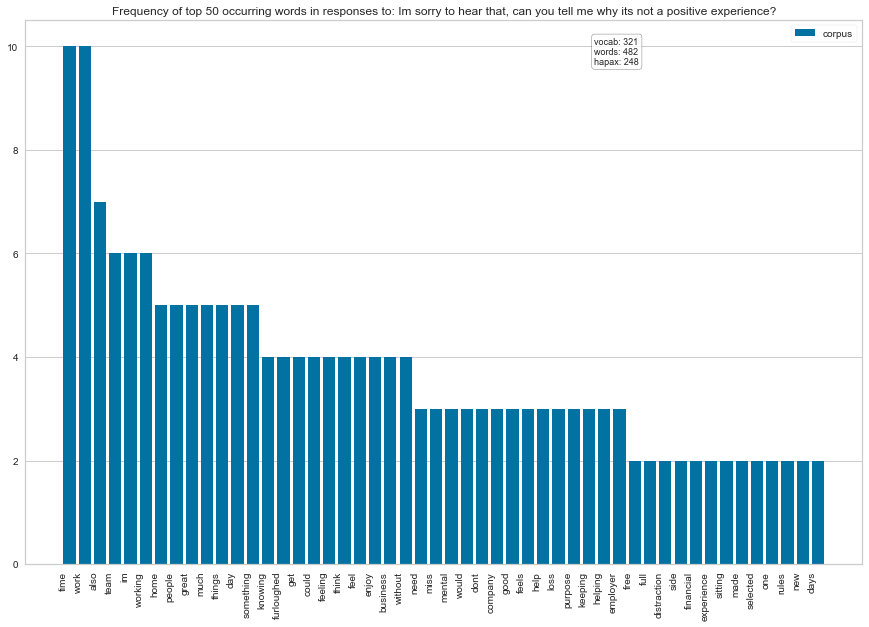

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(why_not_positive['text'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720), title='Frequency of top 50 occurring words in responses to: Im sorry to hear that, can you tell me why its not a positive experience?')
visualizer.fit(docs)
visualizer.show()

### Why enjoying it text reponse analysis and cleaning

In [78]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

why_enjoying_it = clean_text(why_enjoying_it, "text")
why_enjoying_it.head()

,text,token
0,im feel like i now have the time to invest in ...,q7ygqc0wetve1pgq7998ef1l3h3ghomc
1,i have lots of creative pursuits that i often ...,qsle0bp9xi6c9n0nic0qsle0ma3xovzq
3,i have more time to study i am able to spend v...,d7x57388oj9pfzwzwod7x5738uex2vna
4,recently moved house so i am very busy i am no...,08h6epyvgp4h1722y08h6epy986gkfnt
5,im looking at the positives and this is bonus ...,bamyisxeo4bm3islq7tbamy45g3jnlm9


In [79]:
stop = stopwords.words('english')
why_enjoying_it['text'] = why_enjoying_it['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
why_enjoying_it.head()

,text,token
0,im feel like time invest im active ive started...,q7ygqc0wetve1pgq7998ef1l3h3ghomc
1,lots creative pursuits often dont time really ...,qsle0bp9xi6c9n0nic0qsle0ma3xovzq
3,time study able spend valuable time family get...,d7x57388oj9pfzwzwod7x5738uex2vna
4,recently moved house busy sure would feel wasn...,08h6epyvgp4h1722y08h6epy986gkfnt
5,im looking positives bonus time giving time wo...,bamyisxeo4bm3islq7tbamy45g3jnlm9


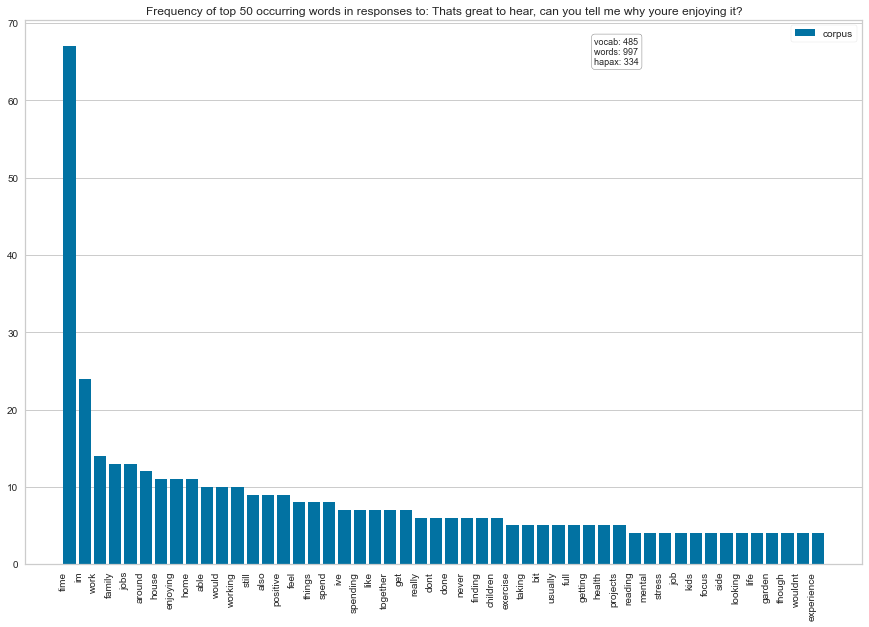

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(why_enjoying_it['text'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720), title='Frequency of top 50 occurring words in responses to: Thats great to hear, can you tell me why youre enjoying it?')
visualizer.fit(docs)
visualizer.show()

### What would help you text reponse analysis and cleaning

In [85]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

what_would_help_you = clean_text(what_would_help_you, "text")
what_would_help_you.head()

,text,token
2,hmmmgood question ive been asking myself that ...,ia3cphe6oj1358lw2hnmia3cphry4t6x
6,something real to focus on something to dampen...,k65zamkqx4hd9npk65s5r6llry7m2a4d
14,something to help give me purpose,yarbka7gdvbfpnufyarl107hyox3f4dc
15,i am going to try and see if i can get a secon...,cez4n2ji6xhuugapbcez4n7131ndsvxm
22,cant think of anything anyone can do to help,ol61crh8x6vlp8ol61cl8jedy6we0lnc


In [86]:
stop = stopwords.words('english')
what_would_help_you['text'] = what_would_help_you['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
what_would_help_you.head()

,text,token
2,hmmmgood question ive asking think finding pur...,ia3cphe6oj1358lw2hnmia3cphry4t6x
6,something real focus something dampen anxiety,k65zamkqx4hd9npk65s5r6llry7m2a4d
14,something help give purpose,yarbka7gdvbfpnufyarl107hyox3f4dc
15,going try see get second job whilst furlough v...,cez4n2ji6xhuugapbcez4n7131ndsvxm
22,cant think anything anyone help,ol61crh8x6vlp8ol61cl8jedy6we0lnc


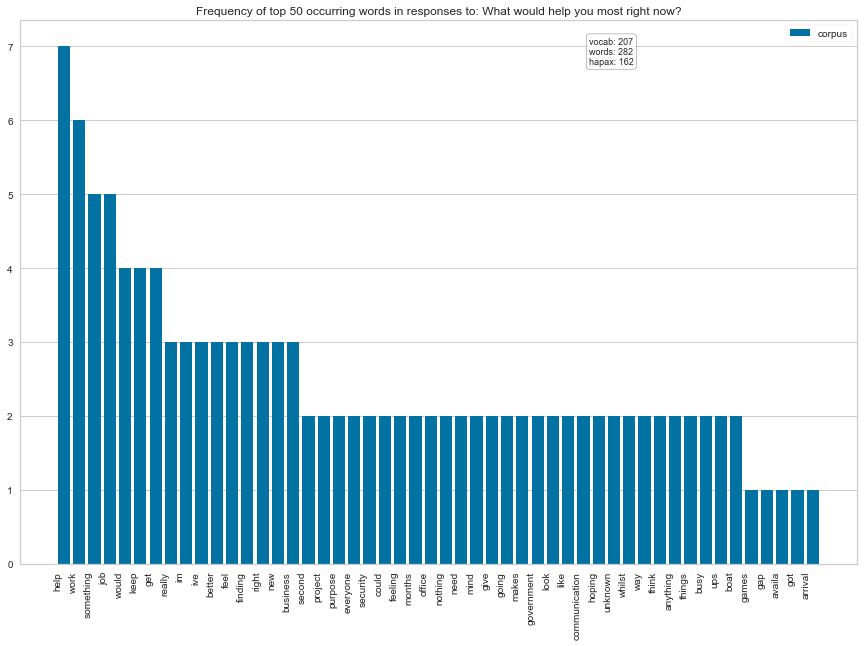

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(what_would_help_you['text'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720), title='Frequency of top 50 occurring words in responses to: What would help you most right now?')
visualizer.fit(docs)
visualizer.show()

### That's really good to hear, why do you think that is? text reponse analysis and cleaning

In [88]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

what_think_that_is = clean_text(what_think_that_is, "text")
what_think_that_is.head()

,text,token
8,i feel kept in the loop with all areas of the ...,38ngqogsgcz9yf21zkn38ngqo5a0d5tt
10,have purpose and am making a difference,vy3xvdok30la8evvy38vtocv8aziyybj
18,the members of the multi channel team that are...,srbj2kw8fw3ch6u0srbj2bv1gm7acqcd
19,everyone working well together and now everyth...,oi60l1bosyhyhkcucu6oi60lzd5oz21u
21,working with a team member who has the opposit...,i10kxbekzt4e5i10c91qa6wur15c2vle


In [89]:
stop = stopwords.words('english')
what_think_that_is['text'] = what_think_that_is['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
what_think_that_is.head()

,text,token
8,feel kept loop areas caretaker team full trans...,38ngqogsgcz9yf21zkn38ngqo5a0d5tt
10,purpose making difference,vy3xvdok30la8evvy38vtocv8aziyybj
18,members multi channel team 10 us rather around...,srbj2kw8fw3ch6u0srbj2bv1gm7acqcd
19,everyone working well together everything cent...,oi60l1bosyhyhkcucu6oi60lzd5oz21u
21,working team member opposite skills set yet th...,i10kxbekzt4e5i10c91qa6wur15c2vle


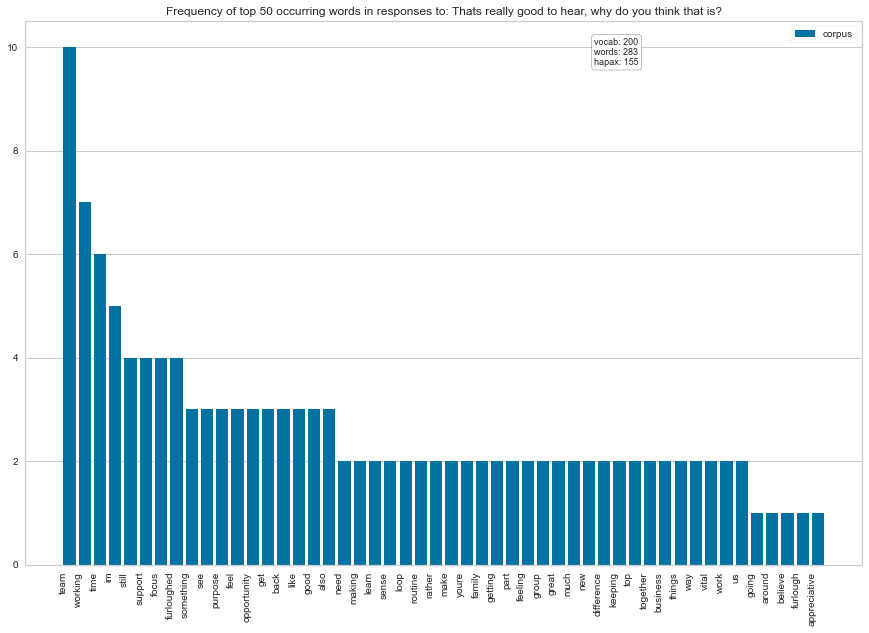

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(what_think_that_is['text'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720), title='Frequency of top 50 occurring words in responses to: Thats really good to hear, why do you think that is?')
visualizer.fit(docs)
visualizer.show()

### Have you learned anything new about yourself? text reponse analysis and cleaning

In [92]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

learned_anything = clean_text(learned_anything, "text")
learned_anything.head()

,text,token
0,i enjoy being at home more than i thought,q7ygqc0wetve1pgq7998ef1l3h3ghomc
1,im definitely obsessively productive if i have...,qsle0bp9xi6c9n0nic0qsle0ma3xovzq
3,yes i do need structure so i have to plan each...,d7x57388oj9pfzwzwod7x5738uex2vna
4,i took things for granted and can be impatient...,08h6epyvgp4h1722y08h6epy986gkfnt
5,not as yet,bamyisxeo4bm3islq7tbamy45g3jnlm9


In [93]:
stop = stopwords.words('english')
learned_anything['text'] = learned_anything['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
learned_anything.head()

,text,token
0,enjoy home thought,q7ygqc0wetve1pgq7998ef1l3h3ghomc
1,im definitely obsessively productive day im re...,qsle0bp9xi6c9n0nic0qsle0ma3xovzq
3,yes need structure plan day even simple things...,d7x57388oj9pfzwzwod7x5738uex2vna
4,took things granted impatient need learn relax...,08h6epyvgp4h1722y08h6epy986gkfnt
5,yet,bamyisxeo4bm3islq7tbamy45g3jnlm9


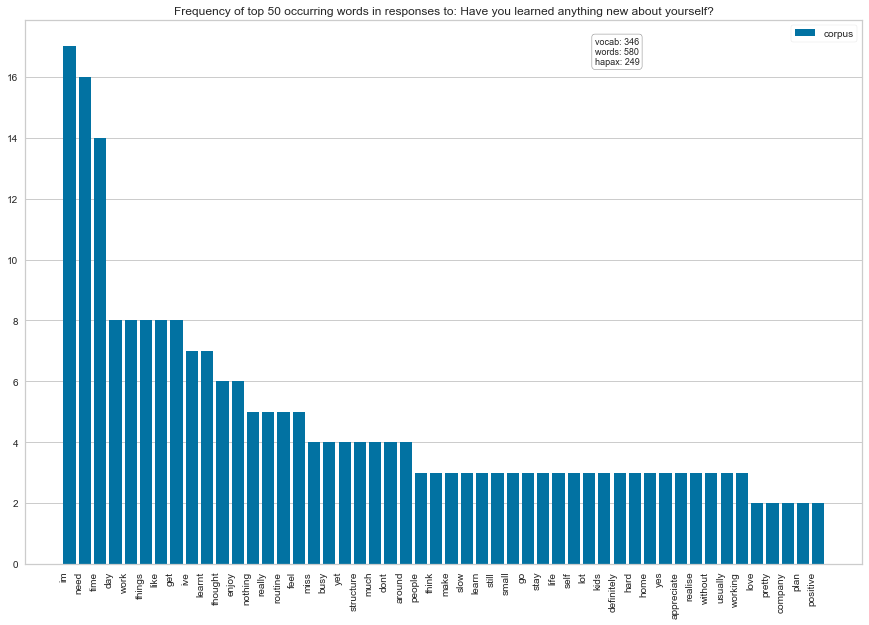

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(learned_anything['text'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720), title='Frequency of top 50 occurring words in responses to: Have you learned anything new about yourself?')
visualizer.fit(docs)
visualizer.show()